In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma, lognorm
from scipy.special import gamma as gamma_func
import seaborn as sns

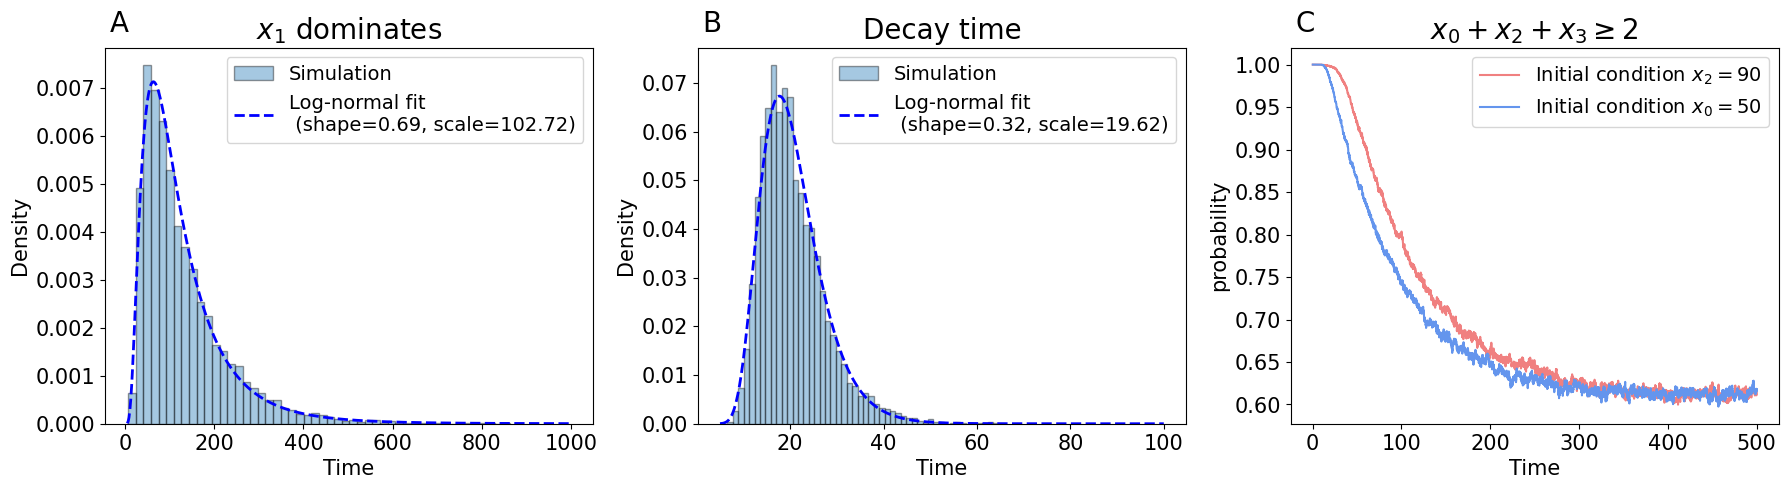

In [2]:
dfx1 = pd.read_csv('Heuristic/x1_dom.csv')
dftime = pd.read_csv('Heuristic/time_ext_x2.csv')
dftime = dftime[dftime['FinalTime'] < 1000]

#plt.figure(figsize=(18,10))
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plt.subplot(1,3,1)

data = dfx1['FinalTime']

# Ajustar Lognormal
shape_logn, loc_l, scale_l = lognorm.fit(data, floc=0)  # también fijamos loc=0 para comparación justa

x = np.linspace(5, 1000, 500)

pdf_lognorm = lognorm.pdf(x, shape_logn, loc_l, scale_l)

plt.hist(data, bins=50, density=True, alpha=0.4, edgecolor='black', label='Simulation')
plt.plot(x, pdf_lognorm, 'b--', lw=2, label=f'Log-normal fit \n (shape={shape_logn:.2f}, scale={scale_l:.2f})')

plt.xlabel('Time',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title(r'$x_1$'+' dominates',fontsize=20)
plt.legend(fontsize=14,title_fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,3,2)

datatime = dftime['FinalTime']

# Ajustar Lognormal
shape_logn_time, loc_l_time, scale_l_time = lognorm.fit(datatime, floc=0)  # también fijamos loc=0 para comparación justa

x = np.linspace(5, 100, 500)

# PDFs ajustadas
pdf_lognorm_time = lognorm.pdf(x, shape_logn_time, loc_l_time, scale_l_time)

# Graficar
plt.hist(datatime, bins=50, density=True, alpha=0.4, edgecolor='black', label='Simulation')
plt.plot(x, pdf_lognorm_time, 'b--', lw=2, label=f'Log-normal fit \n (shape={shape_logn_time:.2f}, scale={scale_l_time:.2f})')

plt.xlabel('Time',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Decay time',fontsize=20)
plt.legend(fontsize=14,title_fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.subplot(1,3,3)

dfratios = pd.read_csv('Heuristic/ratios.csv')
dfratios = dfratios[dfratios['kCS']=='cs005']

plt.plot(dfratios[dfratios['IC']=='x290']['Time'], dfratios[dfratios['IC']=='x290']['x0x2x3>=2'],label='Initial condition '+'$x_2=90$',color='lightcoral')
plt.plot(dfratios[dfratios['IC']=='x050']['Time'], dfratios[dfratios['IC']=='x050']['x0x2x3>=2'],label='Initial condition '+'$x_0=50$',color='cornflowerblue')

plt.xlabel('Time',fontsize=15)
plt.ylabel('probability',fontsize=15)
plt.title(r'$x_0 + x_2 + x_3 \geq 2 $',fontsize=20)
plt.legend(fontsize=14,title_fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


axes = axes.flatten()
# Letras A, B, C, ...
letters = ['A','B','C','D','E','F']

for i, ax in enumerate(axes):
    # Agrega la letra en la esquina superior izquierda de cada subplot
    ax.text(
        0.01, 1.1, letters[i],                # posición relativa en el eje (0,0 es abajo izquierda)
        transform=ax.transAxes,                # usa coordenadas relativas al eje
        fontsize=20, va='top'
    )

plt.tight_layout()
#plt.savefig('FigS5.png',dpi=300)
plt.show()

**Distributions for key transition times in the model.**
Empirical distributions (blue histograms) and fitted lognormal probability density functions (dashed curves) for two temporal processes underlying the heuristic extinction estimate. 
(*A*) Time until the system transitions between stable states following an antibiotic change. Starting from $x_2(0)=80$ and $x_i(0)=0$ for $i=0,1,3$ under antibiotic $A$ until $x_1(t)>80$. 
(*B*) Time to extinction under a new antibiotic, measured only for simulations where extinction occurs. 
(*C*) Time dependent probability of having $x_0+x_2+x_3 \geq 2$ starting from the initial conditions indicated by colors in the legend.
$10000$ trajectories were simulated for estimating these distributions.

In [3]:
def px3_v3(tau,ronda=2,u=2):
    shape_logn = df_parametros[(df_parametros['Dist']=='Lognormal')&(df_parametros['Variable']=='x1')&(df_parametros['kCS']==0.05)]['shape'].iloc[0]
    scale_l = df_parametros[(df_parametros['Dist']=='Lognormal')&(df_parametros['Variable']=='x1')&(df_parametros['kCS']==0.05)]['scale'].iloc[0]
    p = lognorm.cdf(tau, shape_logn, 0, scale_l)

    if ronda > 1:
        xp = dfratios[dfratios['IC']=='x290']['Time'].values
        fp = dfratios[dfratios['IC']=='x290']['x0x2x3>='+str(u)].values

        xpi = dfratios[dfratios['IC']=='x050']['Time'].values
        fpi = dfratios[dfratios['IC']=='x050']['x0x2x3>='+str(u)]
        
        return np.interp(tau, xp, fp)*(p) + (1-p)*np.interp(tau,xpi,fpi)
    else:
        xpi = dfratios[dfratios['IC']=='x050']['Time'].values
        fpi = dfratios[dfratios['IC']=='x050']['x0x2x3>='+str(u)]
        
        return np.interp(tau, xpi, fpi)

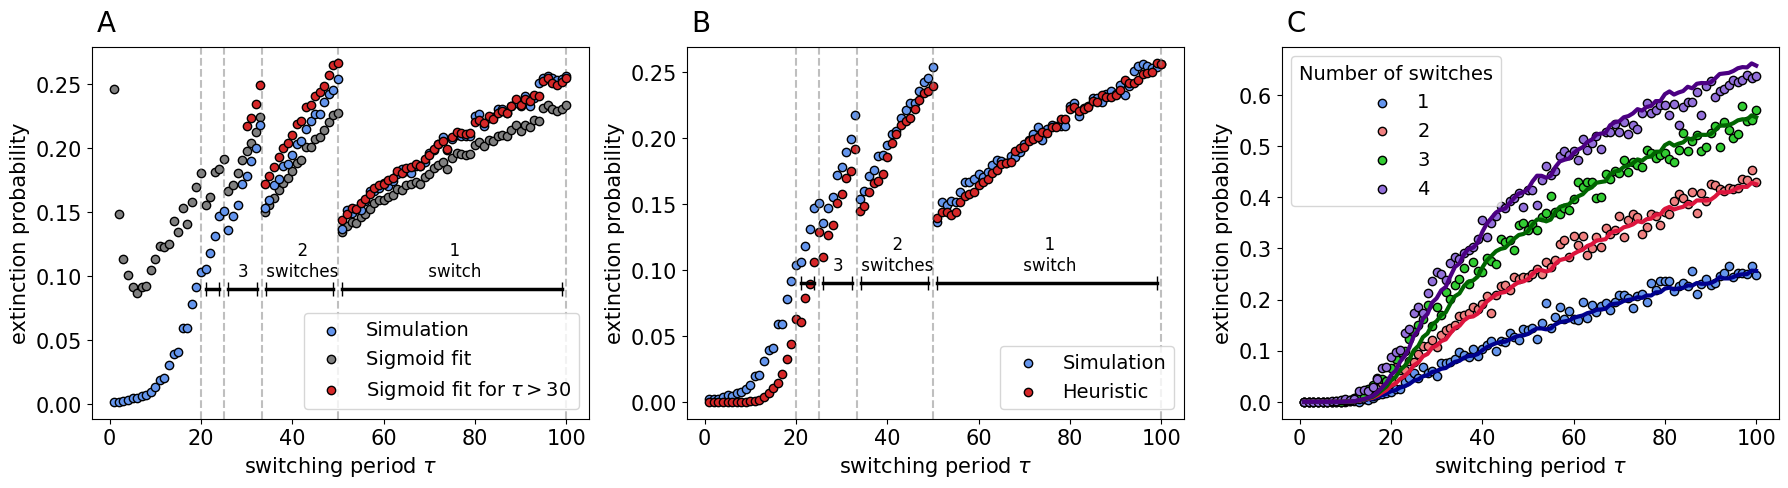

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plt.subplot(1,3,1)

df1 = pd.read_csv('Heuristic/prediccion_sigmoideX.csv')

dfext1 = df1.groupby(['SeasonLength','Round']).mean(numeric_only=True).reset_index()
dfext1 = dfext1.groupby(['SeasonLength']).sum(numeric_only=True).reset_index()


df2 = pd.read_csv('Heuristic/prediccion_sigmoideX30.csv')
dfext2 = df2.groupby(['SeasonLength','Round']).mean(numeric_only=True).reset_index()
dfext2 = dfext2.groupby(['SeasonLength']).sum(numeric_only=True).reset_index()


dfaux = pd.read_csv('Extinction curve/ext_rate_n10000.csv')
dfaux['Dead'] = dfaux['FinalTime'] < 150

dfextaux = dfaux.groupby(['Dead', 'SeasonLength','Trajectory']).count().reset_index()
dfextaux = dfextaux.groupby(['Dead', 'SeasonLength']).count().reset_index()
dfextaux['ExtRate'] = 1 - dfextaux['Trajectory']/10000

dfextaux = dfextaux[dfextaux['Dead']==False]
plt.scatter(dfextaux['SeasonLength'], dfextaux['ExtRate'],zorder=10, color='cornflowerblue', label='Simulation',ec='black')

plt.scatter(dfext1['SeasonLength'], dfext1['P_model4'],label='Sigmoid fit',ec='black',color='gray')
plt.scatter(dfext2['SeasonLength'], dfext2['P_model4'],label='Sigmoid fit for '+r'$ \tau  > 30$',ec='black',color='tab:red',zorder=30)

for i in range(1,6):
    plt.axvline(x=100/i,linestyle='--',color='gray',alpha=0.5)
    if i == 3 or i==4:
        #plt.text(100/i - 5,0.0,str(i)+' switches',rotation='vertical',fontsize=15)
        pass
        
plt.text(75,0.1,'  1 \n switch',fontsize=12,ha='center')
plt.plot([51,99],[0.09,0.09],marker='|',color='black',linewidth=2.5,ms=10)

plt.text(83.3/2,0.1,'  2 \n switches',fontsize=12,ha='center')#,bbox=dict(facecolor='white', edgecolor='black'))
plt.plot([34.3,49],[0.09,0.09],marker='|',color='black',linewidth=2.5,ms=10)

plt.text((100/4 + 100/3)/2,0.1,'3',fontsize=12,ha='center')
plt.plot([100/4+1,100/3-1],[0.09,0.09],marker='|',color='black',linewidth=2.5,ms=10)
#plt.text((100/4 + 100/5)/2,0.1,'4',fontsize=12,ha='center')
plt.plot([100/5+1,100/4-1],[0.09,0.09],marker='|',color='black',linewidth=2.5,ms=10)

plt.xlabel('switching period '+r'$\tau$',fontsize=15)
plt.ylabel('extinction probability',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14,title_fontsize=14)

plt.subplot(1,3,3)

df_parametros = pd.read_csv('Heuristic/parametros_ajustes_kCS.csv')
df_parametros = df_parametros[df_parametros['Variable'] != 'x3']

df1 = pd.read_csv('Extinction curve/ext_rate_oneS.csv')
df1['Switch'] = [1]*df1.shape[0]
df2 = pd.read_csv('Extinction curve/ext_rate_twoS.csv')
df2['Switch'] = [2]*df2.shape[0]
df3 = pd.read_csv('Extinction curve/ext_rate_threeS.csv')
df3['Switch'] = [3]*df3.shape[0]
df4 = pd.read_csv('Extinction curve/ext_rate_fourS.csv')
df4['Switch'] = [4]*df4.shape[0]
df = pd.concat([df1, df2, df3, df4])
df['Dead'] = df['FinalTime'] < df['Switch']*df['SeasonLength'] + 50

dfext = df.groupby(['SeasonLength','Dead','Switch']).count().reset_index()

dfext = dfext[dfext['Dead']==False]
dfext['ExtRate'] = 1 - dfext['Trajectory'] / 1000

#dfext005 = pd.read_csv('fig3C_datos_simulaciones_saul.csv')
#dfext005 = dfext005.drop('Unnamed: 0',axis=1)
dfext005 = dfext.rename(columns={'Switch':'n'})

dfratios = pd.read_csv('Heuristic/ratios.csv')
dfratios = dfratios[dfratios['kCS']=='cs005']

#sns.scatterplot(data=dfext005, x='SeasonLength',y='ExtRate',hue='n',palette='Set3',ec='black')

colordict = {
    1:'cornflowerblue',
    2:'lightcoral',
    3:'limegreen',
    4:'mediumpurple'
}

colordictfit = {
    1:'darkblue',
    2:'crimson',
    3:'darkgreen',
    4:'indigo'
}

for u, dfu in dfext005.groupby('n'):
    plt.scatter(dfu['SeasonLength'],dfu['ExtRate'],ec='black',color=colordict[u],label=str(u))

shape_logn_time = df_parametros[(df_parametros['Dist']=='Lognormal')&(df_parametros['Variable']=='decay')]['shape'].iloc[0]
scale_l_time = df_parametros[(df_parametros['Dist']=='Lognormal')&(df_parametros['Variable']=='decay')]['scale'].iloc[0]

for nswitch in range(1,5):
    x_curve = np.linspace(1,100,100)
    y_curvel = np.zeros(len(x_curve))
    t_end = 100
    for i,tau in enumerate(x_curve):
        
        pl = lognorm.cdf(tau, shape_logn_time, 0, scale_l_time)*(1 - px3_v3(tau,ronda=nswitch) )
        pr_l = lognorm.cdf(50, shape_logn_time, 0, scale_l_time)*(1 - px3_v3(tau, ronda=nswitch) )

        if nswitch == 1:
            y_curvel[i] = 1-((1-pl)**(nswitch-1))*(1-pr_l)
        else:
            pl1 = lognorm.cdf(tau, shape_logn_time, 0, scale_l_time)*(1 - px3_v3(tau,ronda=1) )

            y_curvel[i] = 1-((1-pl)**(nswitch-2))*(1-pr_l)*(1-pl1)
    #y_curvel = sc.signal.medfilt(y_curvel,kernel_size=5)
    plt.plot(x_curve, y_curvel,color=colordictfit[nswitch],linewidth=3)
    
plt.xlabel('switching period '+r'$\tau$',fontsize=15)
plt.ylabel('extinction probability',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Number of switches',title_fontsize=14,fontsize=14)


plt.subplot(1,3,2)

dfe = pd.read_csv('Extinction curve/ext_rate_n10000.csv')

dfe['Dead'] = dfe['FinalTime'] < 150
dfext = dfe.groupby(['Dead', 'SeasonLength']).count().reset_index()
dfext['Ext rate'] = 1 - dfext['Trajectory']/10000
dfext = dfext[dfext['Dead']==False]

plt.scatter(dfext['SeasonLength'], dfext['Ext rate'], ec='black', label='Simulation',color='cornflowerblue')

x_curve = np.linspace(1,100,100)
y_curvel = np.zeros(len(x_curve))
t_end = 100
for i,tau in enumerate(x_curve):
    nswitch = 100 // tau
    
    pl = lognorm.cdf(tau, shape_logn_time, 0, scale_l_time)*(1 - px3_v3(tau,ronda=nswitch) )
    pr_l = lognorm.cdf(100%tau + 50, shape_logn_time, 0, scale_l_time)*(1 - px3_v3(tau, ronda=nswitch) )

    if nswitch == 1:
        y_curvel[i] = 1-((1-pl)**(nswitch-1))*(1-pr_l)
    else:
        pl1 = lognorm.cdf(tau, shape_logn_time, 0, scale_l_time)*(1 - px3_v3(tau,ronda=1) )

        y_curvel[i] = 1-((1-pl)**(nswitch-2))*(1-pr_l)*(1-pl1)
#y_curvel = sc.signal.medfilt(y_curvel,kernel_size=5)
plt.scatter(x_curve, y_curvel, ec='black',label='Heuristic',color='tab:red')

for i in range(1,6):
    plt.axvline(x=100/i,linestyle='--',color='gray',alpha=0.5)
    if i == 3 or i==4:
        #plt.text(100/i - 5,0.0,str(i)+' switches',rotation='vertical',fontsize=15)
        pass
        
plt.text(75,0.1,'  1 \n switch',fontsize=12,ha='center')
plt.plot([51,99],[0.09,0.09],marker='|',color='black',linewidth=2.5,ms=10)

plt.text(83.3/2,0.1,'  2 \n switches',fontsize=12,ha='center')#,bbox=dict(facecolor='white', edgecolor='black'))
plt.plot([34.3,49],[0.09,0.09],marker='|',color='black',linewidth=2.5,ms=10)

plt.text((100/4 + 100/3)/2,0.1,'3',fontsize=12,ha='center')
plt.plot([100/4+1,100/3-1],[0.09,0.09],marker='|',color='black',linewidth=2.5,ms=10)
#plt.text((100/4 + 100/5)/2,0.1,'4',fontsize=12,ha='center')
plt.plot([100/5+1,100/4-1],[0.09,0.09],marker='|',color='black',linewidth=2.5,ms=10)


plt.legend(fontsize=14,title_fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('switching period '+r'$\tau$',fontsize=15)
plt.ylabel('extinction probability',fontsize=15)


axes = axes.flatten()
# Letras A, B, C, ...
letters = ['A','B','C','D','E','F']

for i, ax in enumerate(axes):
    # Agrega la letra en la esquina superior izquierda de cada subplot
    ax.text(
        0.01, 1.1, letters[i],                # posición relativa en el eje (0,0 es abajo izquierda)
        transform=ax.transAxes,                # usa coordenadas relativas al eje
        fontsize=20, va='top'
    )
    
plt.tight_layout()
#plt.savefig('Fig3.png',dpi=300)
plt.show()

**Heuristic approximation for the extinction probability.**
(*A*) Sigmoid fit using the population composition before the switch. Blue circles represent the simulation; gray circles are the prediction of the sigmoid function fitted with the population before the switches; and red circles are the prediction of the sigmoid function fitted with the population before the switches for switching periods greater than $30$.
(*B*) Heuristic fit for fixed final time treatments, %$t_{\mathrm{end}}=100 + 50$ 
considering different treatments of switching period $\tau$.
(*C*) Heuristic fit for the extinction probability under different number of antibiotic switches. Circles are the values of extinction probabilities measured in simulations; each color represents a different number of antibiotic changes, as indicated in the legend. The solid lines indicate the estimated value of the probability of extinction for each $\tau$, using the heuristic to estimate $p$. Parameter values are shown in *SI Appendix*, Table S2.